In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
covidtotales = pd.read_csv("data/covidtotals.csv")
covidtotales.set_index("iso_code", inplace=True)

In [4]:
totales=['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']
demograficas=['population','pop_density','median_age','gdp_per_capita','hosp_beds']

Estudiar otros metodos de correlacion como spearman

In [6]:
covidtotales.corr(method="pearson")

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
total_cases,1.00,0.93,0.18,0.25,0.27,-0.03,0.16,0.19,0.03
total_deaths,0.93,1.00,0.18,0.39,0.21,-0.03,0.21,0.20,0.02
total_cases_pm,0.18,0.18,1.00,0.59,-0.06,0.13,0.32,0.66,0.08
total_deaths_pm,0.25,0.39,0.59,1.00,-0.01,0.04,0.40,0.39,0.12
population,0.27,0.21,-0.06,-0.01,1.00,-0.02,0.02,-0.06,-0.04
pop_density,-0.03,-0.03,0.13,0.04,-0.02,1.00,0.18,0.32,0.31
median_age,0.16,0.21,0.32,0.40,0.02,0.18,1.00,0.65,0.66
gdp_per_capita,0.19,0.20,0.66,0.39,-0.06,0.32,0.65,1.00,0.30
hosp_beds,0.03,0.02,0.08,0.12,-0.04,0.31,0.66,0.30,1.00


In [7]:
matriz_corr=covidtotales.corr(method="pearson")

<AxesSubplot:>

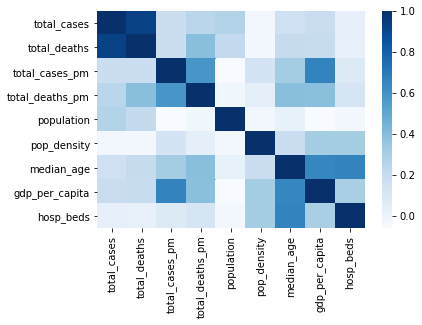

In [11]:
sns.heatmap(matriz_corr, cmap="Blues")

In [13]:
covidtotales_cumu = covidtotales.loc[:, totales] 

In [16]:

covidtotales_cumu["total_cases_q"]= pd.qcut(covidtotales_cumu['total_cases'], labels=['muy poco','poco','medio', 'alto', 'muy alto'], q=5,precision=0)

In [17]:
covidtotales_cumu["total_deaths_q"]= pd.qcut(covidtotales_cumu['total_deaths'],labels=['muy poco','poco','medio', 'alto', 'muy alto'], q=5,precision=0)

#### estudiar crosstab y qcut

In [18]:
pd.crosstab(covidtotales_cumu.total_cases_q,covidtotales_cumu.total_deaths_q)

total_deaths_q,muy poco,poco,medio,alto,muy alto
total_cases_q,,,,,
muy poco,34,7,1,0,0
poco,12,19,10,1,0
medio,1,13,15,13,0
alto,0,0,12,24,6
muy alto,0,0,2,4,36


In [20]:
covidtotales.loc[(covidtotales_cumu.total_cases_q=="muy alto") & (covidtotales_cumu.total_deaths_q=="medium")].T

iso_code
lastdate
location
total_cases
total_deaths
total_cases_pm
total_deaths_pm
population
pop_density
median_age
gdp_per_capita
